## Olympics Data Analysis

### Introduction
The Olympic Games are the world's largest sporting event, held for over a century and bringing together athletes from different countries. This project aims to explore historical Olympic data to uncover patterns and trends related to athlete participation, medal distribution, and the dominance of certain countries over the years. Through Exploratory Data Analysis (EDA), we will analyze trends and visualize key aspects of the Games.

### Objectives
- Conduct an Exploratory Data Analysis (EDA) of the Olympic Games dataset.
- Analyze trends, athlete participation, medal distributions, and top-performing countries.


# Importing libraries & data

In [1]:
import numpy as np  # Importing NumPy for numerical computations

import pandas as pd  # Importing pandas for data manipulation and analysis

import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization

import seaborn as sns  # Importing Seaborn for statistical data visualization

# %matplotlib inline  # Enabling inline plotting for Jupyter Notebook (ensures plots appear directly in the notebook)

import warnings  
warnings.filterwarnings("ignore")  # Disabling warnings to keep the output clean

### Analysis of Summer Olympics Data
In this analysis, the Summer Olympics dataset has been cleaned by:
- Replacing missing values with the mean value.
- Filling missing player names using the forward fill method.

### Analysis of Summer and Winter Olympics Data
In this analysis, both the Summer and Winter Olympics datasets have been analyzed by:
- Visualizing the top 10 countries in terms of medals and sports.
- Analyzing the distribution of medals by gender.

### Summary of Data Processing and Analysis:
- Cleaning and analyzing Summer and Winter Olympics data
- Handling missing values in country and athlete data
- Analyzing medal distribution by gender
- Identifying top-performing countries in medals and sports participation
- Using data visualization to enhance insights
"""

In [2]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis

df_winter = pd.read_csv("E:/Data Science/Porject of Analysis/Datasets olympaic/winter.csv")  
# Reading the CSV file "winter.csv" from the specified path and storing it in a DataFrame

df_winter  # Displaying the DataFrame content

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [3]:
df_winter.info()  # Displays a concise summary of the DataFrame, including column names, non-null counts, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [4]:
df_winter['Athlete'] = df_winter['Athlete'].str.split(', ').str[::-1].str.join(' ')  
# Splitting the athlete's name by ", ", reversing the order (from "Last, First" to "First Last"), and joining it back as a single string.

df_winter['Athlete'] = df_winter['Athlete'].str.title()  
# Converting the athlete's name to title case (first letter of each word capitalized).

df_winter.head()  # Displaying the first 5 rows of the DataFrame to check the changes.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold


In [5]:
Gender_Medal = df_winter.groupby("Gender")['Medal'].value_counts().reset_index()  
# Grouping the data by 'Gender' and counting the occurrences of each medal type, then resetting the index to return a structured DataFrame.

Gender_Medal  # Displaying the resulting DataFrame.

,Gender,Medal,count
0,Men,Silver,1319
1,Men,Bronze,1315
2,Men,Gold,1310
3,Women,Gold,611
4,Women,Silver,611
5,Women,Bronze,604


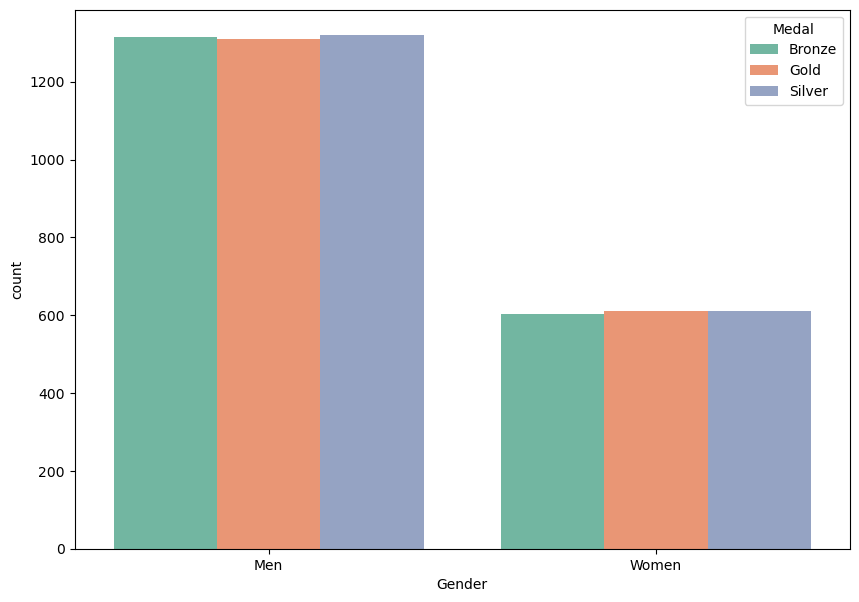

In [6]:
plt.figure(figsize=(10, 7))  
# Creating a figure with a specified size (10 inches by 7 inches).

sns.countplot(data=df_winter, x='Gender', hue='Medal', palette='Set2')  
# Creating a count plot using Seaborn to show the number of medals won by each gender.
# The 'hue' parameter separates the medal types (Gold, Silver, Bronze) with different colors.
# 'palette' is set to 'Set2' for a visually appealing color scheme.

plt.show()  
# Displaying the plot.

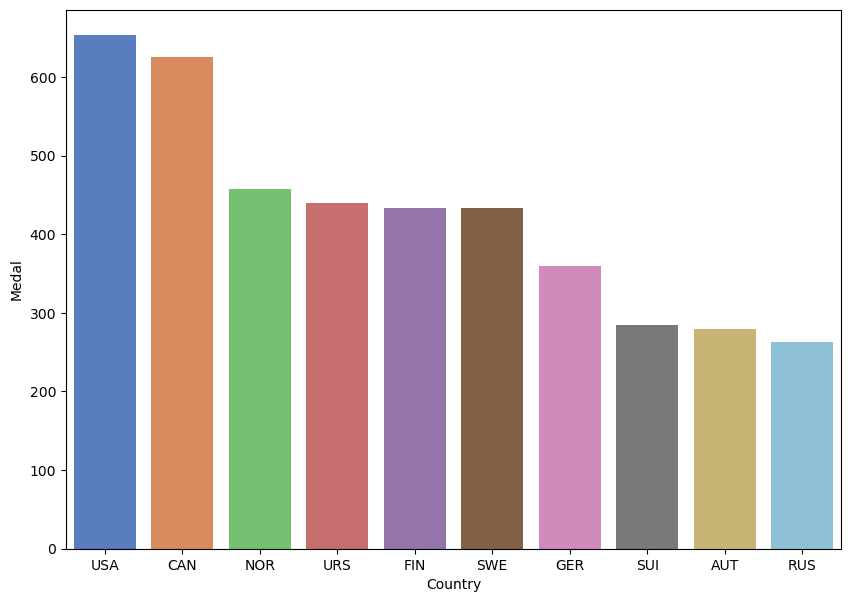

In [7]:
plt.figure(figsize=(10, 7))  
# Creating a figure with a specified size (10 inches by 7 inches).

Top_Medal = df_winter.groupby('Country')['Medal'].count().nlargest(10).reset_index()  
# Grouping the data by 'Country' and counting the total number of medals won by each country.
# Selecting the top 10 countries with the highest medal counts and resetting the index.

sns.barplot(x='Country', y='Medal', hue='Country', data=Top_Medal, palette='muted')  
# Creating a bar plot to visualize the top 10 medal-winning countries.
# 'hue=Country' ensures each country gets a unique color for clarity.
# 'palette' is set to 'muted' for a balanced color scheme.

plt.show()  
# Displaying the plot.

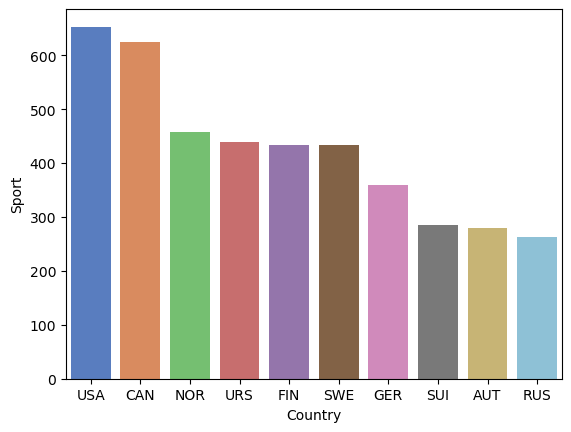

In [8]:
Top_Sport = df_winter.groupby('Country')['Sport'].count().nlargest(10).reset_index()  
# Grouping the data by 'Country' and counting the number of occurrences of different sports.
# Selecting the top 10 countries with the highest sport participation count and resetting the index.

sns.barplot(x='Country', y='Sport', hue='Country', data=Top_Sport, palette='muted')  
# Creating a bar plot to visualize the top 10 countries based on the number of sports they participated in.
# 'hue=Country' assigns a unique color to each country.
# 'palette' is set to 'muted' for a visually appealing color scheme.

plt.show()  
# Displaying the plot.

In [9]:
df_summer = pd.read_csv("E:/Data Science/Porject of Analysis/Datasets olympaic/summer.csv")  
# Reading the CSV file "summer.csv" from the specified path and storing it in a DataFrame.

df_summer.head()  
# Displaying the first 5 rows of the DataFrame to preview the data.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [10]:
df_summer.info()  
# Displays a concise summary of the DataFrame, including:
# - The number of non-null values in each column.
# - The data types of each column.
# - The total memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [11]:
df_summer.isna().sum()  
# Checking for missing values in each column of the DataFrame.
# This returns the total count of NaN (null) values for each column.

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [12]:
df_summer[df_summer['Country'].isna()]  
# Filtering and displaying rows where the 'Country' column has missing (NaN) values.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [13]:
df_summer['Country'].fillna(method='ffill', inplace=True)  
# Filling missing values in the 'Country' column using forward fill (ffill).
# This propagates the last valid value forward to fill NaN values.

df_summer.isna().sum()  
# Checking again for missing values in the DataFrame to ensure they have been handled.

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [14]:
df_summer['Athlete'] = df_summer['Athlete'].str.split(', ').str[::-1].str.join(' ')  
# Splitting the athlete's name by ", ", reversing the order (from "Last, First" to "First Last"), and joining it back as a single string.

df_summer['Athlete'] = df_summer['Athlete'].str.title()  
# Converting the athlete's name to title case (capitalizing the first letter of each word).

df_summer.head()  
# Displaying the first 5 rows of the DataFrame to check the changes.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [15]:
Gender_Medal = df_summer.groupby("Gender")['Medal'].value_counts().reset_index()  
# Grouping the data by 'Gender' and counting the occurrences of each medal type.
# Resetting the index to return a structured DataFrame.

Gender_Medal  # Displaying the resulting DataFrame.

,Gender,Medal,count
0,Men,Gold,7698
1,Men,Bronze,7539
2,Men,Silver,7509
3,Women,Bronze,2830
4,Women,Silver,2801
5,Women,Gold,2788


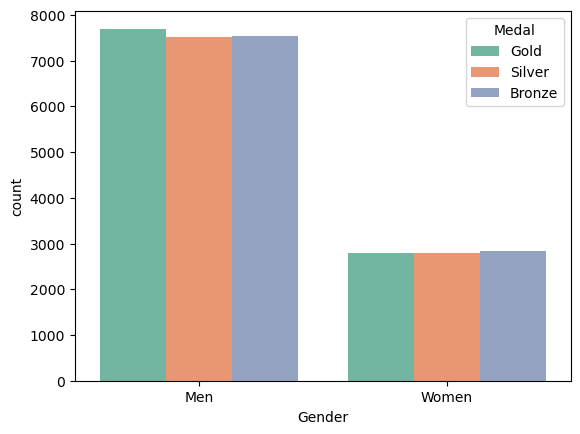

In [16]:
sns.countplot(data=df_summer, x='Gender', hue='Medal', palette='Set2')  
# Creating a count plot to visualize the number of medals won by each gender.
# The 'hue' parameter differentiates medal types (Gold, Silver, Bronze) with different colors.
# 'palette' is set to 'Set2' for a visually appealing color scheme.

plt.show()  
# Displaying the plot.

In [17]:
df_dictionary = pd.read_csv("E:/Data Science/Porject of Analysis/Datasets olympaic/dictionary.csv")  
# Reading the CSV file "dictionary.csv" from the specified path and storing it in a DataFrame.

df_dictionary  # Displaying the DataFrame.

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [18]:
df_dictionary.isna().sum()  
# Checking for missing values in each column of the DataFrame.
# This returns the total count of NaN (null) values for each column.

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

In [19]:
df_dictionary['Population'].fillna(df_dictionary['Population'].mean(), inplace=True)  
# Filling missing values in the 'Population' column with the column's mean value.
# 'inplace=True' applies the changes directly to the DataFrame.

In [20]:
df_dictionary.loc[:, 'GDP per Capita'] = df_dictionary['GDP per Capita'].fillna(df_dictionary['GDP per Capita'].mean())  
# Filling missing values in the 'GDP per Capita' column with the column's mean value.
# The `loc` method ensures the assignment is done correctly without triggering a warning.

In [21]:
df_dictionary.isna().sum()  
# Checking again for missing values in the DataFrame to ensure they have been handled.

Country           0
Code              0
Population        0
GDP per Capita    0
dtype: int64

### Data Collection and Cleaning in Olympic Data

#### 1. Data Merging
- Added **Season** column to both summer and winter datasets:

  ```python
  df_summer['Season'] = 'Summer'
  df_winter['Season'] = 'Winter'
  ```
- Merged the summer and winter datasets into one DataFrame using **pd.concat()**.

#### 2. Column Renaming
- Renamed the **Country_x** column to **Country** to maintain consistency.

#### 3. Missing Values Detection
- Displayed DataFrame information using **df.info()** to check for missing values.
- Visualized missing values using **Heatmap** from Seaborn.

#### 4. Handling Missing Values
- Filled missing values in the **Population** column with the **Mean**.
- Filled missing values in the **GDP per Capita** column with the **Mean**.

#### 5. Data Validation
- Rechecked DataFrame information to ensure missing values were properly handled.



In [22]:
df_summer['Season'] = 'Summer'  
# Adding a new column 'Season' to the summer dataset and setting its value to 'Summer' for all rows.

df_winter['Season'] = 'Winter'  
# Adding a new column 'Season' to the winter dataset and setting its value to 'Winter' for all rows.

In [23]:
olympic_df = pd.concat([df_summer, df_winter], ignore_index=True)  
# Combining the summer and winter Olympics datasets into a single DataFrame.
# 'ignore_index=True' resets the index to maintain a continuous sequence.

olympic_df  # Displaying the merged DataFrame.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,Winter
36931,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,Winter
36932,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Winter
36933,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Winter


In [24]:
df_olympic = pd.merge(olympic_df, df_dictionary, how='left', left_on='Country', right_on='Code')  
# Merging the Olympic dataset with the dictionary dataset based on the 'Country' column in olympic_df 
# and the 'Code' column in df_dictionary.
# 'how="left"' ensures all records from olympic_df are kept, adding matching details from df_dictionary.

df_olympic  # Displaying the merged DataFrame.

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Season,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Summer,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Summer,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,Winter,United Kingdom,GBR,65138232.0,43875.969614
36931,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,Winter,United States,USA,321418820.0,56115.718426
36932,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Winter,Canada,CAN,35851774.0,43248.529909
36933,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic,CZE,10551219.0,17548.338213


In [25]:
df_olympic.drop(columns=['Country_y', 'Code'], inplace=True)  
# Dropping unnecessary columns: 
# - 'Country_y' (duplicate from the merge process).
# - 'Code' (since 'Country_x' already represents the country).

df_olympic  # Displaying the updated DataFrame.


,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Season,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Summer,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Summer,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,Winter,65138232.0,43875.969614
36931,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,Winter,321418820.0,56115.718426
36932,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Winter,35851774.0,43248.529909
36933,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Winter,10551219.0,17548.338213


In [26]:
df_olympic.rename(columns={'Country_x': 'Country'}, inplace=True)  
# Renaming the 'Country_x' column to 'Country' for clarity after the merge.

In [27]:
df_olympic.info()  
# Displays a concise summary of the DataFrame, including:
# - Column names and data types.
# - The number of non-null values in each column.
# - The total memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            36935 non-null  int64  
 1   City            36935 non-null  object 
 2   Sport           36935 non-null  object 
 3   Discipline      36935 non-null  object 
 4   Athlete         36935 non-null  object 
 5   Country         36935 non-null  object 
 6   Gender          36935 non-null  object 
 7   Event           36935 non-null  object 
 8   Medal           36935 non-null  object 
 9   Season          36935 non-null  object 
 10  Population      30572 non-null  float64
 11  GDP per Capita  30572 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


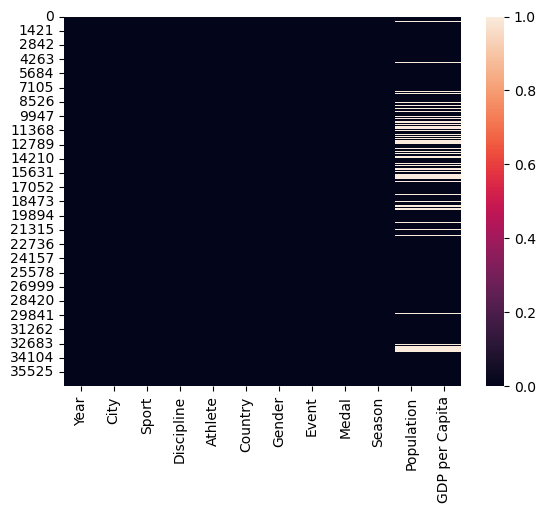

In [28]:
sns.heatmap(df_olympic.isna())  
# Creating a heatmap to visualize missing values in the DataFrame.
# Missing values are highlighted, making it easier to identify patterns of missing data.

plt.show()  
# Displaying the heatmap.

In [29]:
df_olympic[df_olympic['Population'].isna()]  
# Filtering and displaying rows where the 'Population' column has missing (NaN) values.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season,Population,GDP per Capita
132,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN
133,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN
134,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,Summer,NaN,NaN
135,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,Summer,NaN,NaN
136,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,Summer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33961,1992,Albertville,Skiing,Freestyle Skiing,Yelizaveta Kozhevnikova,EUN,Women,Moguls,Silver,Winter,NaN,NaN
33977,1992,Albertville,Skiing,Ski Jumping,Tomas Goder,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN
33978,1992,Albertville,Skiing,Ski Jumping,Frantisek Jez,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN
33979,1992,Albertville,Skiing,Ski Jumping,Jiri Parma,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN


In [30]:
df_olympic['Population'].fillna(df_olympic['Population'].mean(), inplace=True)  
# Filling missing values in the 'Population' column with the column's mean value.

df_olympic['GDP per Capita'].fillna(df_olympic['GDP per Capita'].mean(), inplace=True)  
# Filling missing values in the 'GDP per Capita' column with the column's mean value.

In [31]:
df_olympic.info()  
# Displays a concise summary of the DataFrame, ensuring all missing values have been handled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            36935 non-null  int64  
 1   City            36935 non-null  object 
 2   Sport           36935 non-null  object 
 3   Discipline      36935 non-null  object 
 4   Athlete         36935 non-null  object 
 5   Country         36935 non-null  object 
 6   Gender          36935 non-null  object 
 7   Event           36935 non-null  object 
 8   Medal           36935 non-null  object 
 9   Season          36935 non-null  object 
 10  Population      36935 non-null  float64
 11  GDP per Capita  36935 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


### Outliers Analysis in Olympic Data

#### 1. Population Outliers Detection
- Used **Boxplot** to visualize outliers in the **Population** column.
- Calculated **IQR (Interquartile Range)** to identify outliers:
  - Q1: First quartile (25%)
  - Q3: Third quartile (75%)
  - IQR = Q3 - Q1
  - Values greater than: Q3 + 1.5 * IQR are considered outliers.

#### 2. GDP per Capita Outliers Detection
- Visualized outliers using **Boxplot** for the **GDP per Capita** column.
- Identified outliers using the same IQR method applied to **Population**.

#### 3. Relationship Between Population and Total Medals
- Created **Scatterplot** to show the relationship between population and total medals.
- Grouped data using **groupby** on the **Country** column.

#### 4. Medals Per Capita
- Converted the **Population** column to **Numeric** using **errors='coerce'** to handle non-numeric values as NaN.
- Calculated medals per capita with the formula:

  ```
  Medals_Per_Capita = Total_Medals / Population
  ```
- Filled missing values with **fillna(0)**.
- Visualized the relationship using **Scatterplot**.

#### 5. GDP per Capita Handling
- Converted the **GDP per Capita** column to **Numeric**.
- Filled missing values with the **Median**.
- Reset index using **reset_index(drop=True)**.

#### 6. Medals Per GDP
- Calculated medals per GDP using the formula:

  ```
  Medals_Per_GDP = Total_Medals / GDP per Capita
  ```
- Filled missing values with **fillna(0)**.
- Visualized the relationship using **Scatterplot** with purple color.

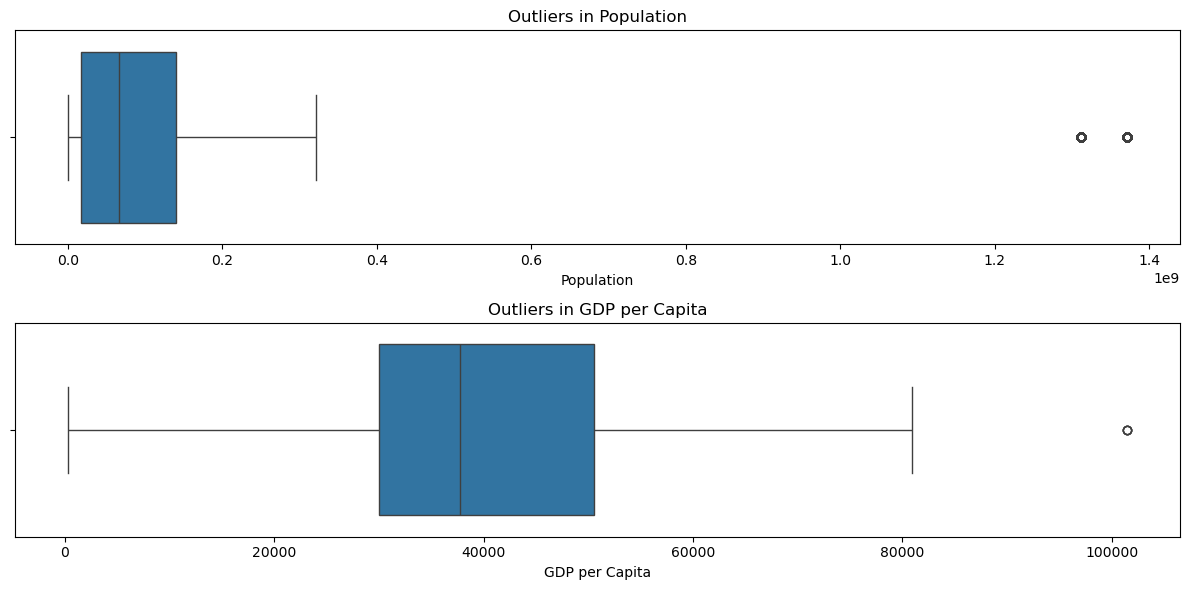

In [32]:
plt.figure(figsize=(12, 6))  
# Creating a figure with a specified size (12 inches by 6 inches).

# Plotting the boxplot for Population
plt.subplot(2, 1, 1)  
sns.boxplot(x=df_olympic['Population'])  
# Creating a boxplot to visualize outliers in the 'Population' column.
plt.title('Outliers in Population')  
# Setting the title for the Population boxplot.

# Plotting the boxplot for GDP per Capita
plt.subplot(2, 1, 2)  
sns.boxplot(x=df_olympic['GDP per Capita'])  
# Creating a boxplot to visualize outliers in the 'GDP per Capita' column.
plt.title('Outliers in GDP per Capita')  
# Setting the title for the GDP per Capita boxplot.

plt.tight_layout()  
# Adjusting layout to prevent overlap between subplots.

plt.show()  
# Displaying the plots.

In [33]:
Q1 = df_olympic['Population'].quantile(0.25)  
# Calculating the first quartile (Q1) of the 'Population' column.

Q3 = df_olympic['Population'].quantile(0.75)  
# Calculating the third quartile (Q3) of the 'Population' column.

IQR = Q3 - Q1  
# Calculating the interquartile range (IQR), which is the difference between Q3 and Q1.

outliers_population = df_olympic[df_olympic['Population'] > Q3 + 1.5 * IQR]  
# Identifying outliers where the 'Population' value is greater than the upper bound (Q3 + 1.5 * IQR).

outliers_population[['Country', 'Population']]  
# Displaying only the 'Country' and 'Population' columns for the identified outlier rows.

,Country,Population
241,IND,1.311051e+09
244,IND,1.311051e+09
5512,IND,1.311051e+09
5513,IND,1.311051e+09
5514,IND,1.311051e+09
...,...,...
36675,CHN,1.371220e+09
36691,CHN,1.371220e+09
36718,CHN,1.371220e+09
36838,CHN,1.371220e+09


In [34]:
Q1_gdp = df_olympic['GDP per Capita'].quantile(0.25)  
# Calculating the first quartile (Q1) of the 'GDP per Capita' column.

Q3_gdp = df_olympic['GDP per Capita'].quantile(0.75)  
# Calculating the third quartile (Q3) of the 'GDP per Capita' column.

IQR_gdp = Q3_gdp - Q1_gdp  
# Calculating the interquartile range (IQR), which is the difference between Q3 and Q1.

outliers_gdp = df_olympic[df_olympic['GDP per Capita'] > Q3_gdp + 1.5 * IQR_gdp]  
# Identifying outliers where the 'GDP per Capita' value is greater than the upper bound (Q3 + 1.5 * IQR).

outliers_gdp[['Country', 'GDP per Capita']]  
# Displaying only the 'Country' and 'GDP per Capita' columns for the identified outlier rows.

,Country,GDP per Capita
4079,LUX,101449.968168
8130,LUX,101449.968168
33892,LUX,101449.968168
33904,LUX,101449.968168


In [35]:
medals_per_country = df_olympic.groupby('Country')['Medal'].count().reset_index()  
# Grouping the data by 'Country' and counting the total number of medals won by each country.
# Resetting the index to return a structured DataFrame.

medals_per_country.columns = ['Country', 'Total_Medals']  
# Renaming the columns for clarity.

medals_per_country  # Displaying the resulting DataFrame.

,Country,Total_Medals
0,AFG,2
1,AHO,1
2,ALG,15
3,ANZ,29
4,ARG,259
...,...,...
143,VIE,2
144,YUG,442
145,ZAM,2
146,ZIM,23


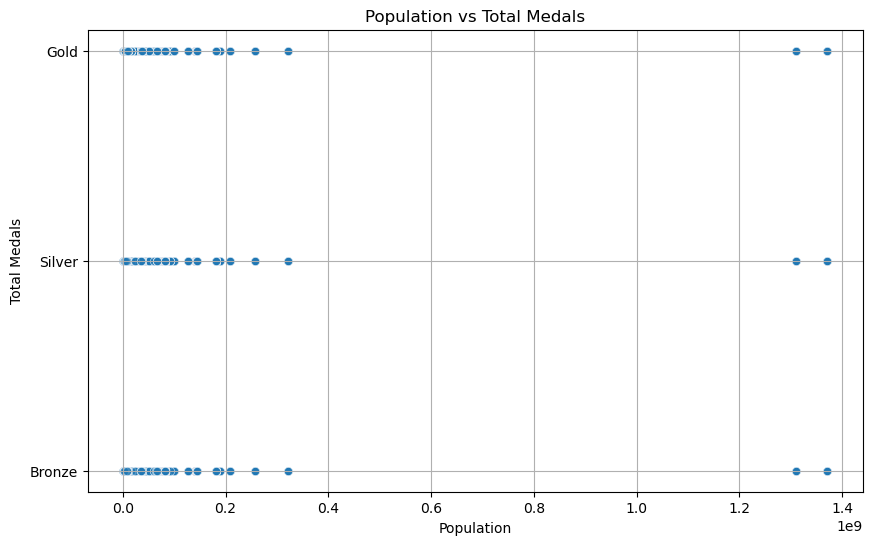

In [36]:
plt.figure(figsize=(10, 6))  
# Creating a figure with a specified size (10 inches by 6 inches).

sns.scatterplot(x='Population', y='Medal', data=df_olympic, alpha=0.7)  
# Creating a scatter plot to visualize the relationship between a country's population and the number of medals won.
# 'alpha=0.7' sets the transparency level to make overlapping points more visible.

plt.title('Population vs Total Medals')  
# Setting the title of the plot.

plt.xlabel('Population')  
# Labeling the x-axis.

plt.ylabel('Total Medals')  
# Labeling the y-axis.

plt.grid()  
# Adding grid lines for better readability.

plt.show()  
# Displaying the plot.

In [37]:
df_olympic['Population'] = pd.to_numeric(df_olympic['Population'], errors='coerce')  
# Converting the 'Population' column to a numeric data type.
# 'errors="coerce"' ensures that any non-numeric values are converted to NaN instead of raising an error.

df_olympic['Total_Medals'] = pd.to_numeric(df_olympic['Medal'], errors='coerce')  
# Converting the 'Medal' column to a numeric data type.
# 'errors="coerce"' is used to handle any non-numeric values.

In [38]:
df_olympic['Medals_Per_Capita'] = df_olympic['Total_Medals'] / df_olympic['Population']  
# Calculating the number of medals won per person by dividing 'Total_Medals' by 'Population'.

df_olympic['Medals_Per_Capita'].fillna(0, inplace=True)  
# Replacing any NaN values (resulting from division by zero or missing data) with 0.

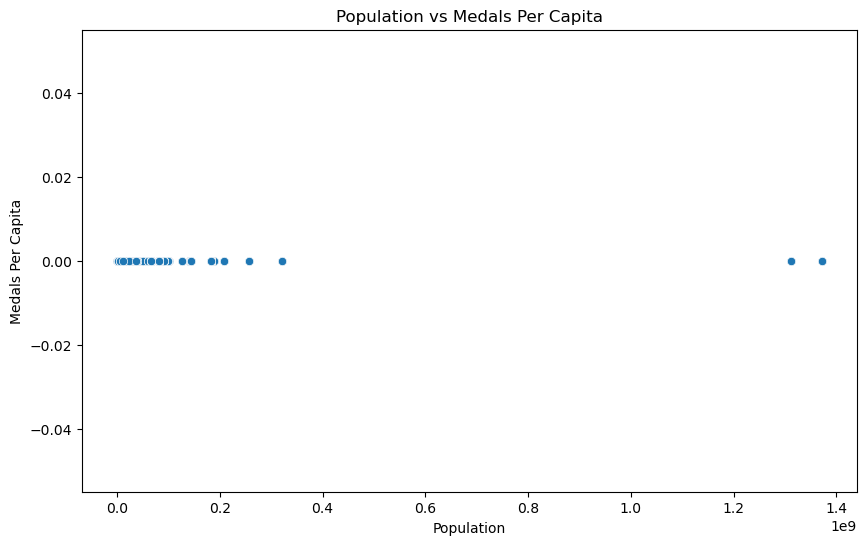

In [39]:
plt.figure(figsize=(10, 6))  
# Creating a figure with a specified size (10 inches by 6 inches).

sns.scatterplot(data=df_olympic, x='Population', y='Medals_Per_Capita')  
# Creating a scatter plot to visualize the relationship between population size and medals per capita.

plt.title('Population vs Medals Per Capita')  
# Setting the title of the plot.

plt.xlabel('Population')  
# Labeling the x-axis.

plt.ylabel('Medals Per Capita')  
# Labeling the y-axis.

plt.show()  
# Displaying the plot.

In [40]:
df_olympic['GDP per Capita'] = pd.to_numeric(df_olympic['GDP per Capita'], errors='coerce')  
# Converting the 'GDP per Capita' column to a numeric data type.
# 'errors="coerce"' ensures that any non-numeric values are converted to NaN instead of raising an error.

df_olympic['GDP per Capita'].fillna(df_olympic['GDP per Capita'].median(), inplace=True)  
# Filling missing values in the 'GDP per Capita' column with the median value of the column.

df_olympic.reset_index(drop=True, inplace=True)  
# Resetting the index of the DataFrame after modifications.

df_olympic['GDP per Capita'].describe()  
# Generating summary statistics for the 'GDP per Capita' column, including count, mean, std, min, and quartiles.

count     36935.000000
mean      37753.650089
std       17984.488824
min         277.068309
25%       29957.804315
50%       37753.650089
75%       50579.673649
max      101449.968168
Name: GDP per Capita, dtype: float64

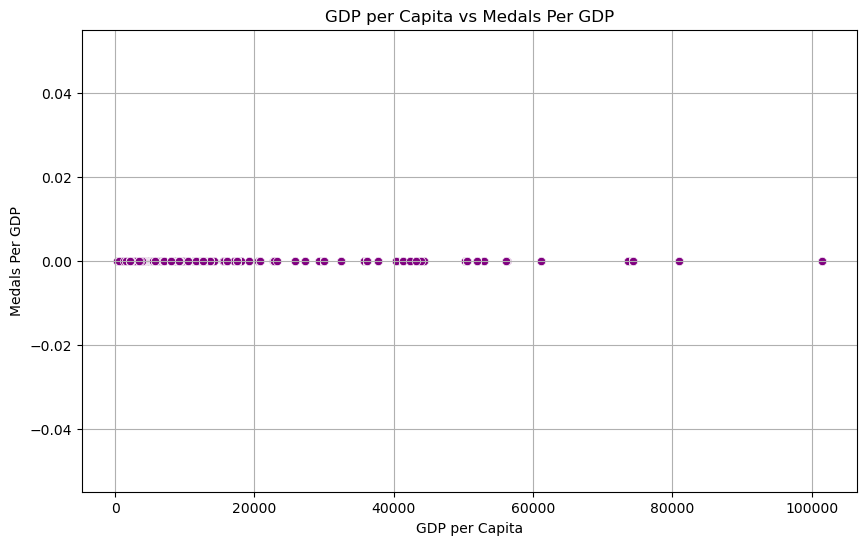

In [41]:
df_olympic['Medals_Per_GDP'] = df_olympic['Total_Medals'] / df_olympic['GDP per Capita']  
# Calculating the number of medals won per unit of GDP per capita.

df_olympic['Medals_Per_GDP'].fillna(0, inplace=True)  
# Replacing any NaN values (resulting from division by zero or missing data) with 0.

plt.figure(figsize=(10, 6))  
# Creating a figure with a specified size (10 inches by 6 inches).

sns.scatterplot(data=df_olympic, x='GDP per Capita', y='Medals_Per_GDP', color='purple')  
# Creating a scatter plot to visualize the relationship between GDP per capita and medals per GDP.

plt.title('GDP per Capita vs Medals Per GDP')  
# Setting the title of the plot.

plt.xlabel('GDP per Capita')  
# Labeling the x-axis.

plt.ylabel('Medals Per GDP')  
# Labeling the y-axis.

plt.grid(True)  
# Adding grid lines for better readability.

plt.show()  
# Displaying the plot.

# Olympics Data Analysis

- Exploratory Data Analysis (EDA) of the Olympic Games dataset
- Analyzing trends, athlete participation, medal distributions, and top-performing countries.

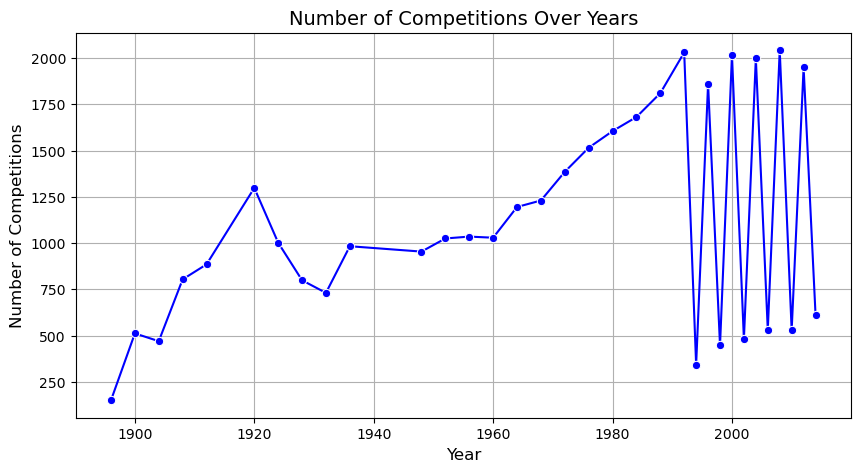

,Year,Count
0,1896,151
1,1900,512
2,1904,470
3,1908,804
4,1912,885
5,1920,1298
6,1924,1002
7,1928,799
8,1932,731
9,1936,983


In [74]:
# Grouping the number of competitions per year
num_of_comp = df_olympic.groupby('Year').size().reset_index()  # Groups data by 'Year' and counts occurrences
num_of_comp.columns = ['Year', 'Count']  # Renaming columns to 'Year' and 'Count'

# Creating the plot
plt.figure(figsize=(10, 5))  # Setting figure size to 10x5 inches
sns.lineplot(data=num_of_comp, x='Year', y='Count', marker="o", linestyle="-", color="b")  
# Drawing a line plot with year on the x-axis and count on the y-axis
# 'marker="o"' adds circular markers to each point
# 'linestyle="-"' connects points with a solid line
# 'color="b"' sets the line color to blue

# Customizing the title and labels
plt.title("Number of Competitions Over Years", fontsize=14)  # Setting the plot title
plt.xlabel("Year", fontsize=12)  # Labeling the x-axis
plt.ylabel("Number of Competitions", fontsize=12)  # Labeling the y-axis
plt.grid(True)  # Enabling grid lines for better readability

# Displaying the plot
plt.show()

# Printing the DataFrame to inspect the number of competitions per year
num_of_comp

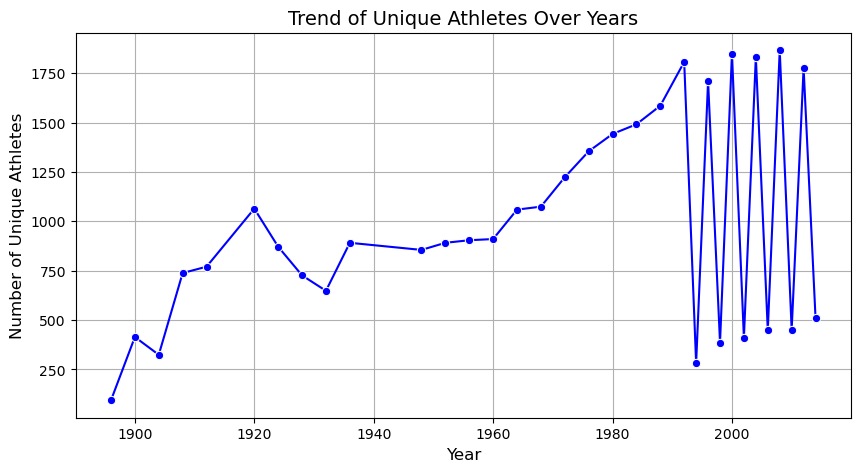

In [75]:
# Grouping the number of unique athletes per year
num_of_athletes = df_olympic.groupby('Year')['Athlete'].nunique().reset_index()  
# Groups data by 'Year' and calculates the number of unique athletes per year
# 'nunique()' counts distinct athletes in each year
# 'reset_index()' resets the index to return a DataFrame

# Creating the plot
plt.figure(figsize=(10, 5))  # Setting figure size to 10x5 inches
sns.lineplot(data=num_of_athletes, x='Year', y='Athlete', marker="o", linestyle="-", color="b")  
# Drawing a line plot with 'Year' on the x-axis and 'Athlete' count on the y-axis
# 'marker="o"' adds circular markers to each point
# 'linestyle="-"' connects points with a solid line
# 'color="b"' sets the line color to blue

# Customizing the title and labels
plt.title("Trend of Unique Athletes Over Years", fontsize=14)  # Setting the plot title
plt.xlabel("Year", fontsize=12)  # Labeling the x-axis
plt.ylabel("Number of Unique Athletes", fontsize=12)  # Labeling the y-axis
plt.grid(True)  # Enabling grid lines for better readability

# Displaying the plot
plt.show()

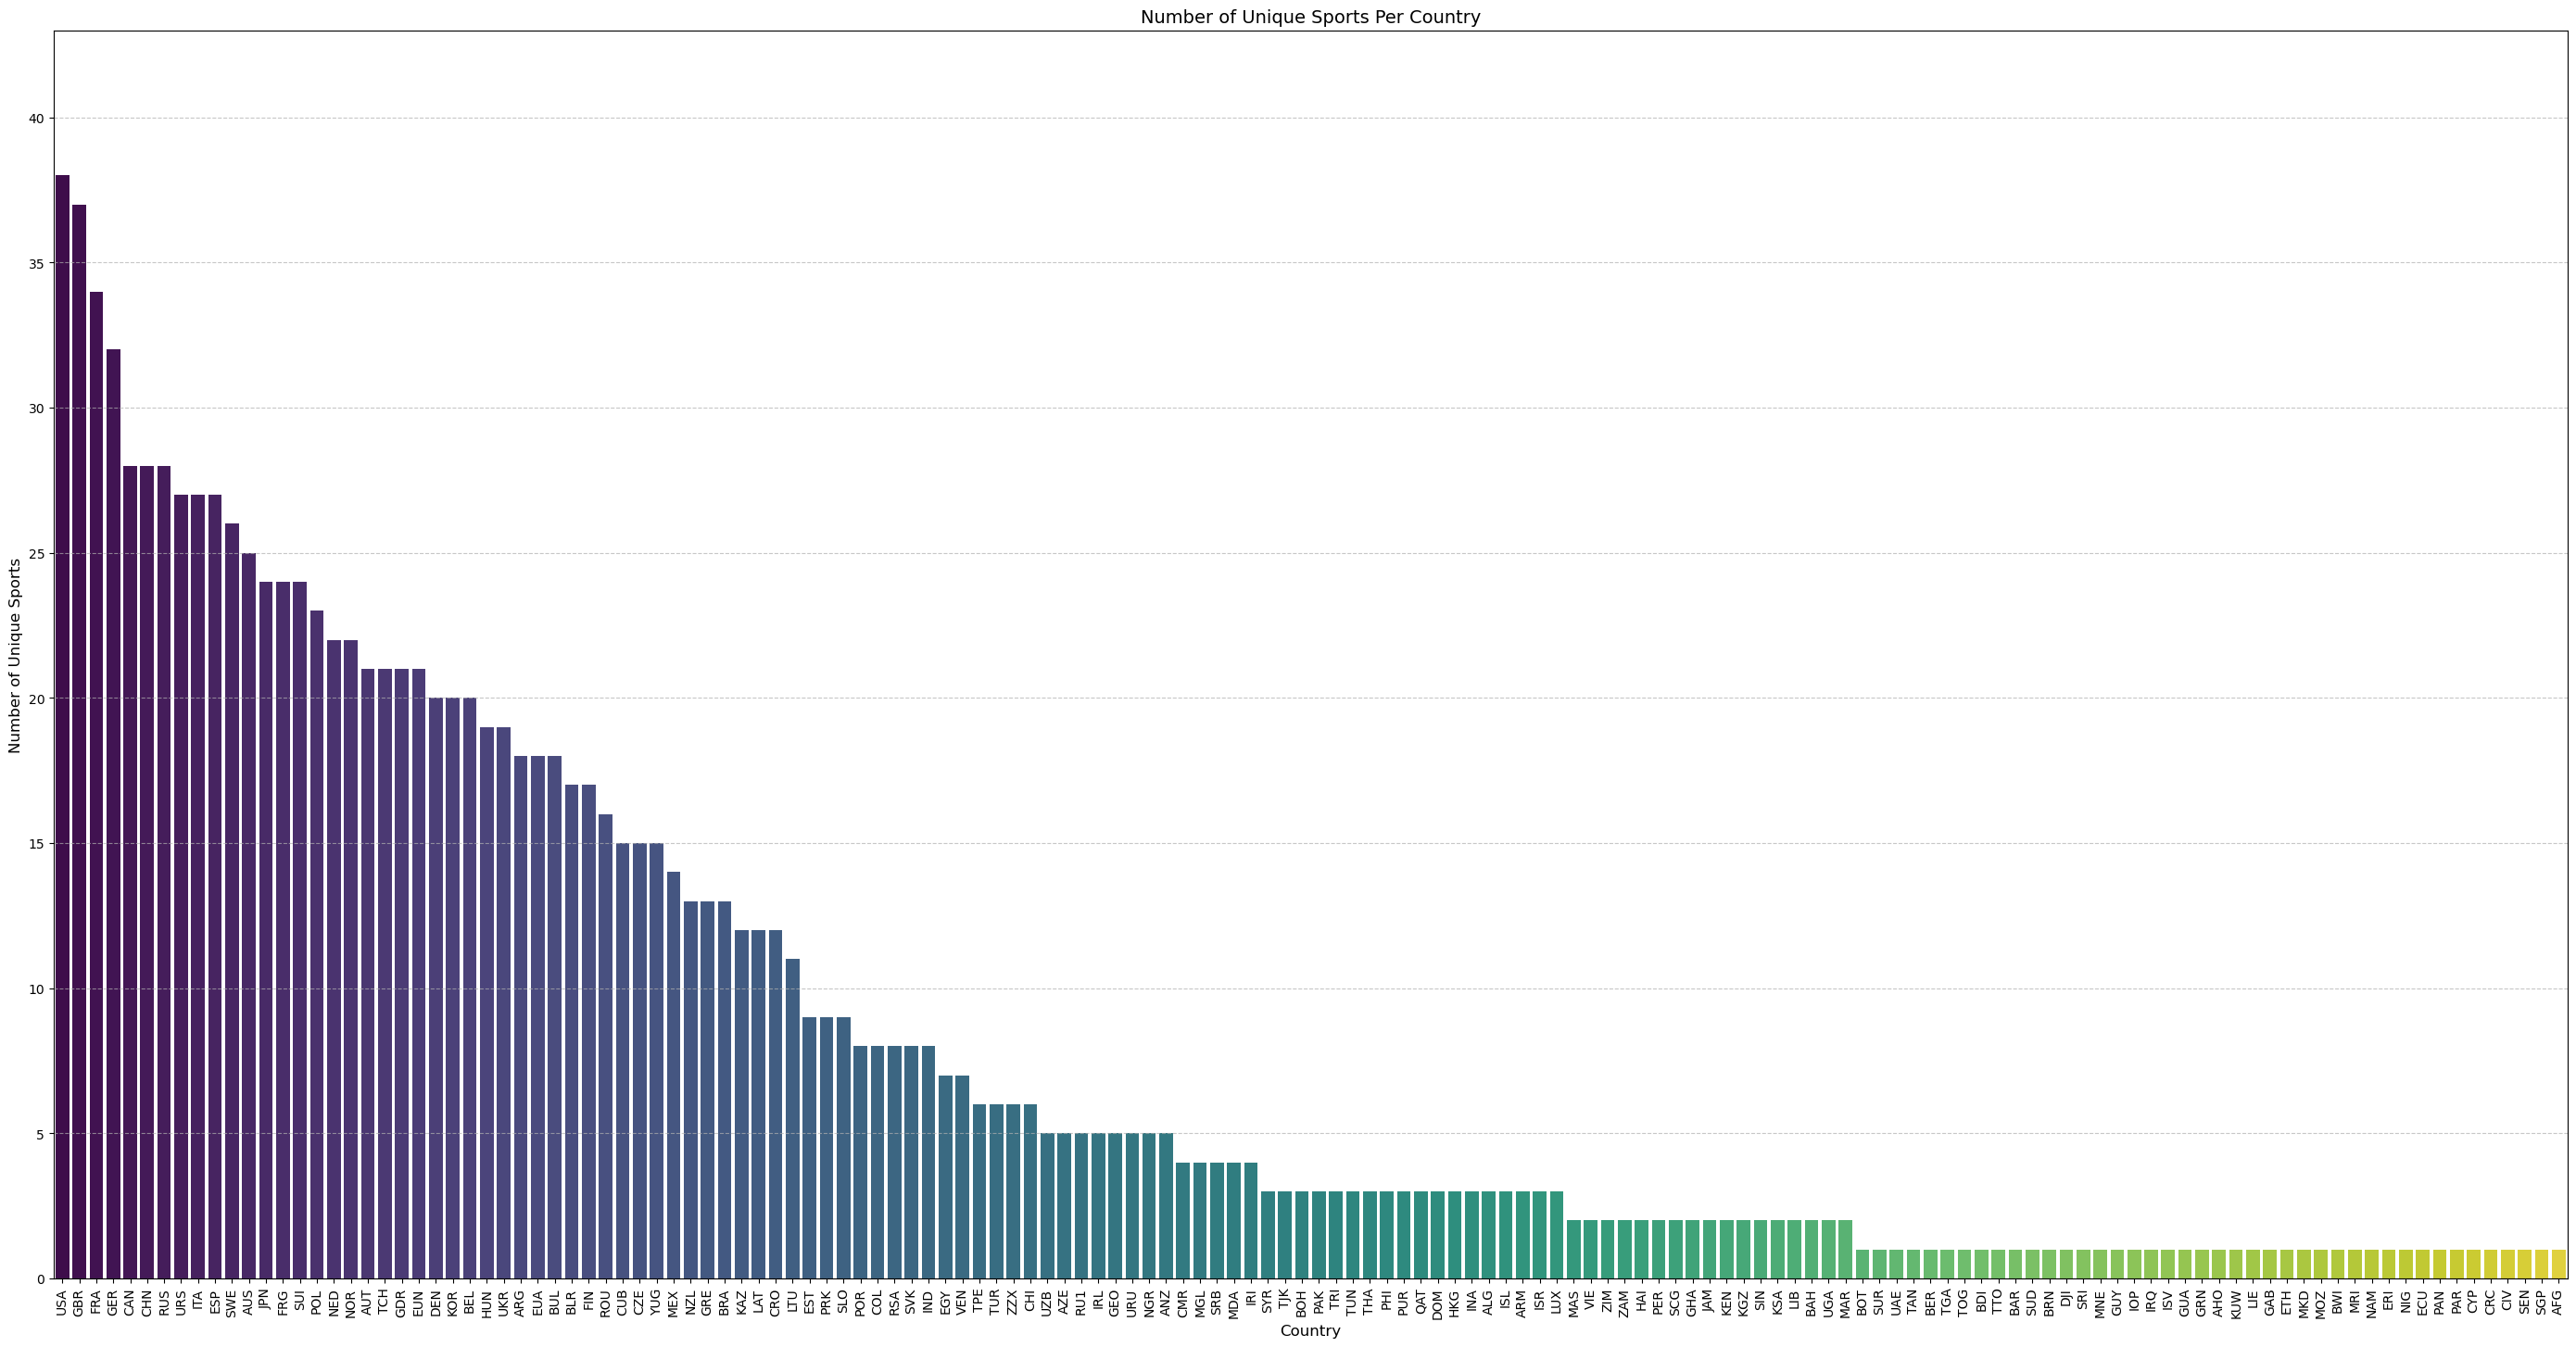

In [53]:
# Grouping the number of unique sports per country
num_of_sports_by_country = df_olympic.groupby('Country')['Sport'].nunique().reset_index()  
# Groups data by 'Country' and calculates the number of unique sports each country has participated in
# 'nunique()' counts distinct sports for each country
# 'reset_index()' resets the index to return a DataFrame

# Sorting the data by the number of unique sports in descending order
num_of_sports_by_country = num_of_sports_by_country.sort_values(by='Sport', ascending=False)  
# Sorting to show countries with the highest number of unique sports first
max_sports = num_of_sports_by_country['Sport'].max()  # Get the maximum number of unique sports

# Creating the plot
plt.figure(figsize=(35, 17.5))  # Setting figure size to 35x17.5 inches for better readability
sns.barplot(data=num_of_sports_by_country, x='Country', y='Sport', palette="viridis")  
# Creating a bar plot with 'Country' on the x-axis and 'Sport' count on the y-axis
# 'palette="viridis"' applies a visually appealing color gradient

# Customizing the title and labels
plt.title("Number of Unique Sports Per Country", fontsize=14)  # Setting the plot title
plt.xlabel("Country", fontsize=12)  # Labeling the x-axis
plt.ylabel("Number of Unique Sports", fontsize=12)  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating country names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding horizontal grid lines for clarity
plt.ylim(0, max_sports + 5)  # Setting Y-axis limits with an extra margin above the maximum value

# Displaying the plot
plt.show()

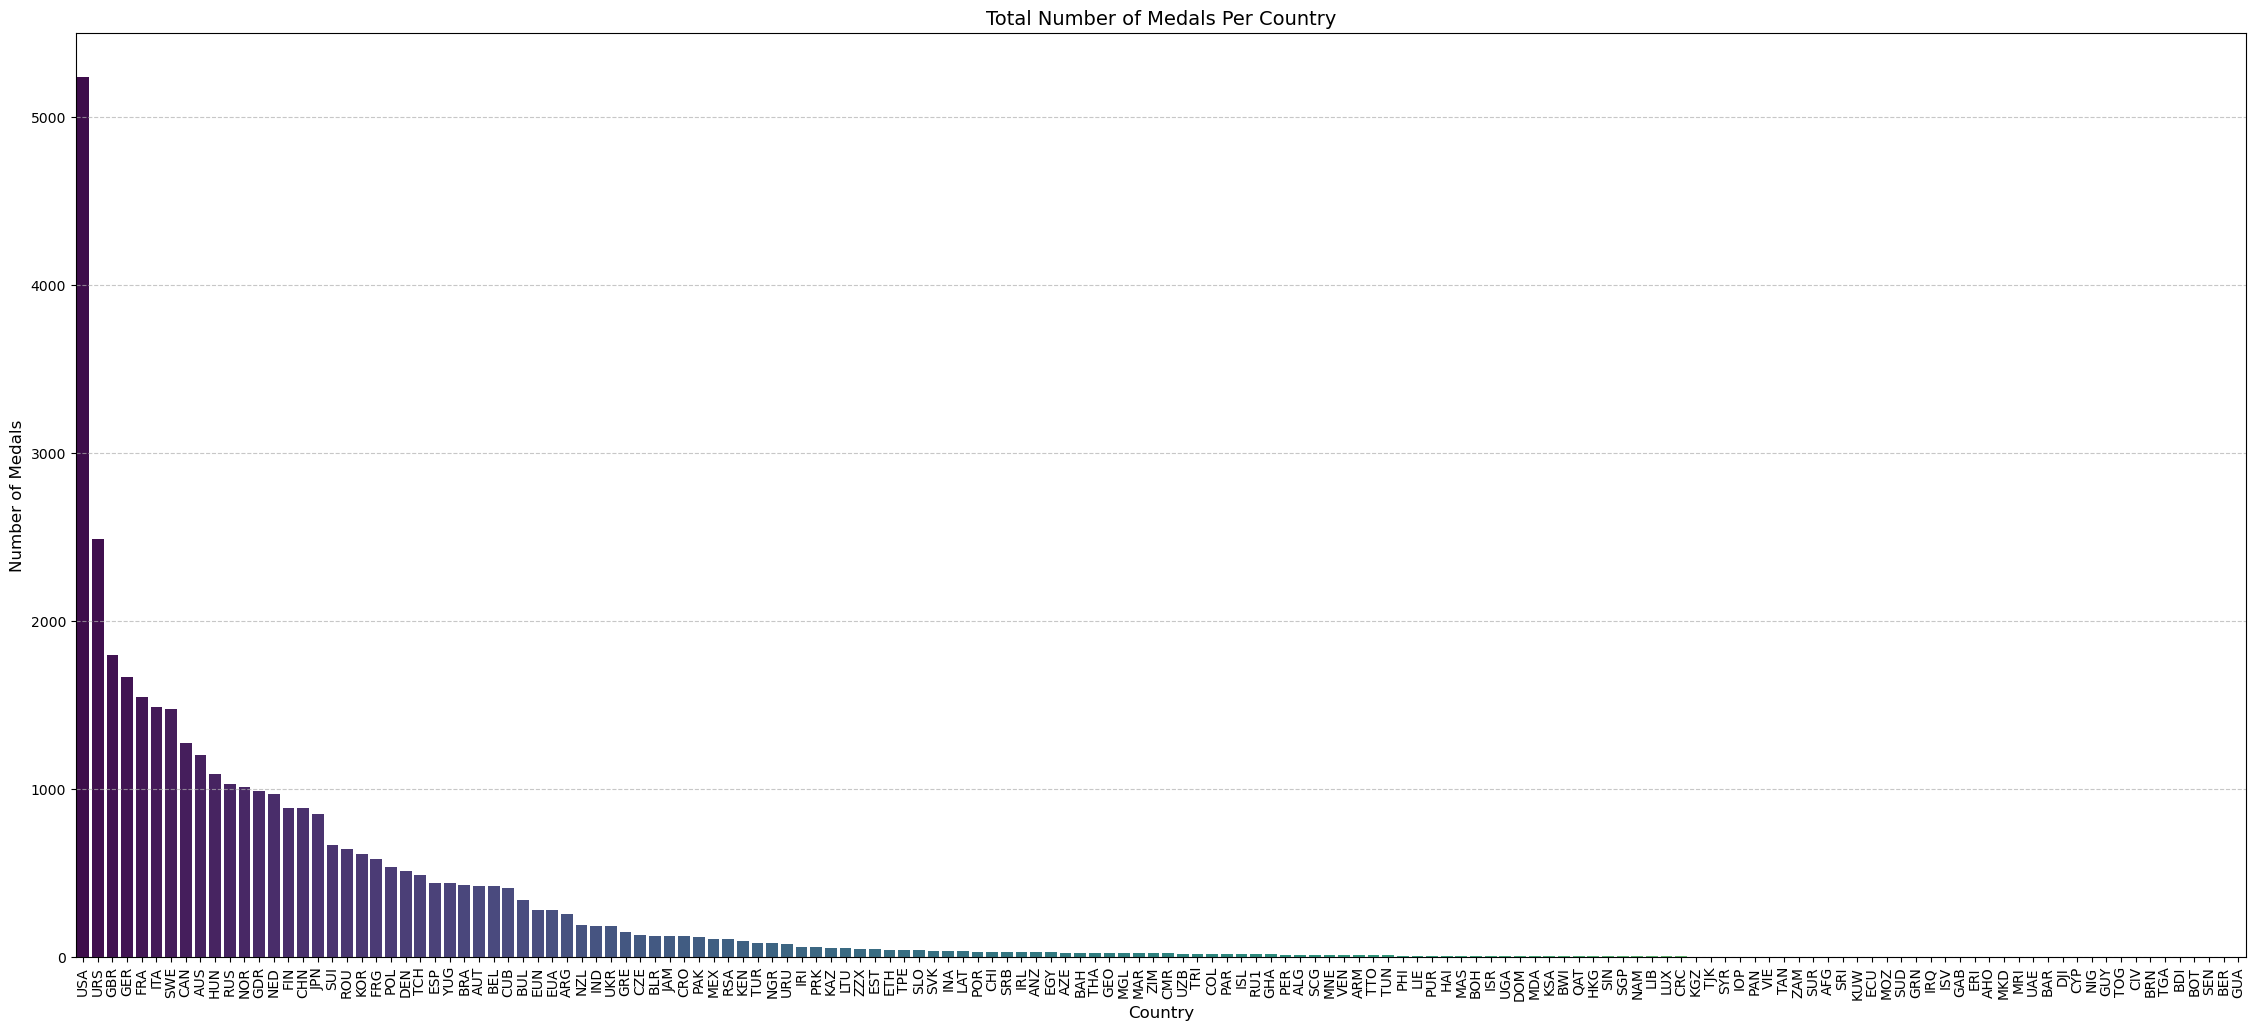

,Country,Medal
140,USA,5238
138,URS,2489
47,GBR,1799
50,GER,1665
44,FRA,1548
...,...,...
11,BDI,1
16,BOT,1
112,SEN,1
13,BER,1


In [56]:
# Grouping the total number of medals per country
num_of_medal_by_country = df_olympic.groupby('Country')['Medal'].count().reset_index()  
# Groups data by 'Country' and counts the total number of medals each country has won
# 'count()' counts the occurrences of medals for each country
# 'reset_index()' resets the index to return a DataFrame

# Sorting the data by the number of medals in descending order
num_of_medal_by_country = num_of_medal_by_country.sort_values(by="Medal", ascending=False)  
# Sorting to display countries with the highest number of medals first

# Creating the plot
plt.figure(figsize=(28, 12))  # Setting figure size to 28x12 inches for better visibility
sns.barplot(data=num_of_medal_by_country, x='Country', y='Medal', palette="viridis")  
# Creating a bar plot with 'Country' on the x-axis and 'Medal' count on the y-axis
# 'palette="viridis"' applies a visually appealing color gradient

# Customizing the title and labels
plt.title("Total Number of Medals Per Country", fontsize=14)  # Setting the plot title
plt.xlabel("Country", fontsize=12)  # Labeling the x-axis
plt.ylabel("Number of Medals", fontsize=12)  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating country names for better readability

# Adding horizontal grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Displaying the plot
plt.show()

# Printing the DataFrame to inspect the total number of medals per country
num_of_medal_by_country

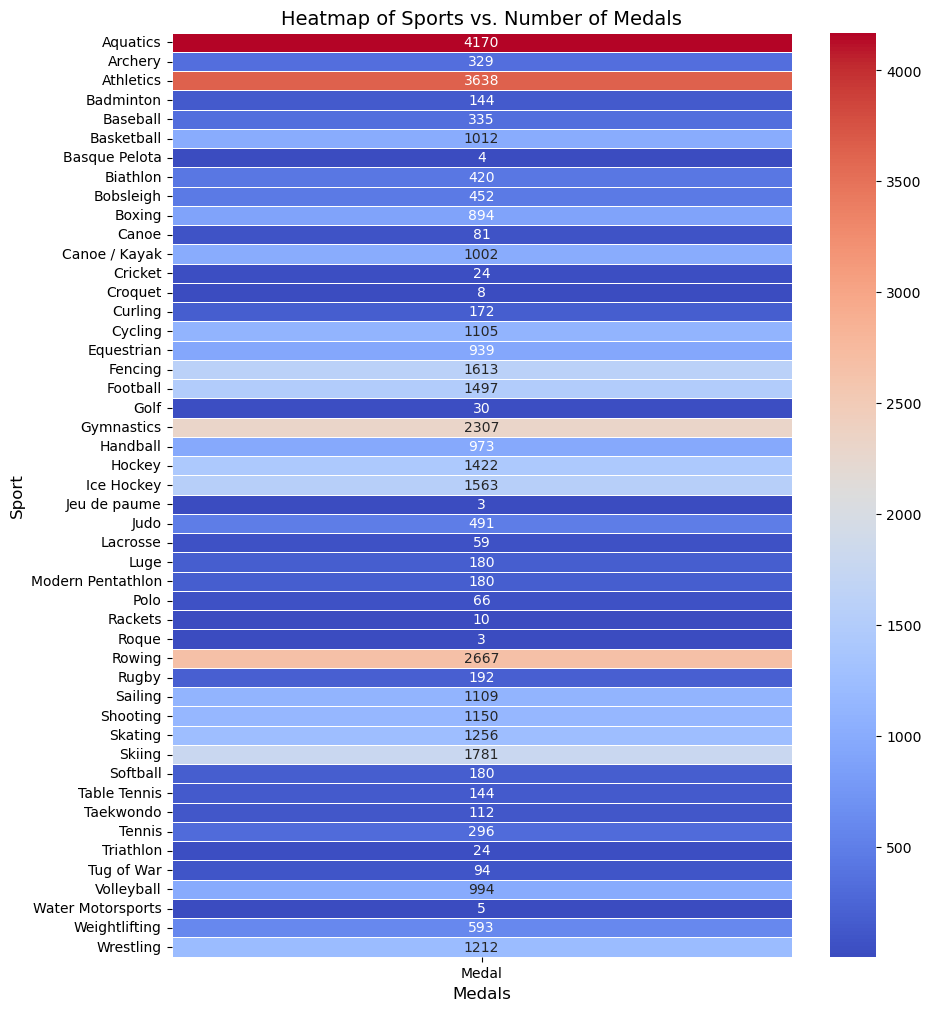

In [47]:
# Grouping the total number of medals per sport
medals_per_sport = df_olympic.groupby('Sport')['Medal'].count().reset_index()  
# Groups data by 'Sport' and counts the total number of medals awarded in each sport
# 'count()' counts the occurrences of medals for each sport
# 'reset_index()' resets the index to return a DataFrame

# Creating a pivot table for the heatmap
p_table = medals_per_sport.pivot_table(values='Medal', index='Sport', aggfunc='sum')  
# Pivoting the data so that 'Sport' becomes the index, and the sum of 'Medal' values is used

# Creating the heatmap
plt.figure(figsize=(10, 12))  # Setting figure size to 10x12 inches
sns.heatmap(p_table, cmap="coolwarm", annot=True, linewidths=0.5, fmt="d")  
# 'cmap="coolwarm"' sets the color gradient
# 'annot=True' displays numerical values inside the heatmap cells
# 'linewidths=0.5' adds lines between cells for better readability
# 'fmt="d"' ensures that numbers are displayed as integers

# Customizing the title and labels
plt.title("Heatmap of Sports vs. Number of Medals", fontsize=14)  # Setting the plot title
plt.xlabel("Medals", fontsize=12)  # Labeling the x-axis (not needed for a heatmap, but added for clarity)
plt.ylabel("Sport", fontsize=12)  # Labeling the y-axis

# Displaying the heatmap
plt.show()

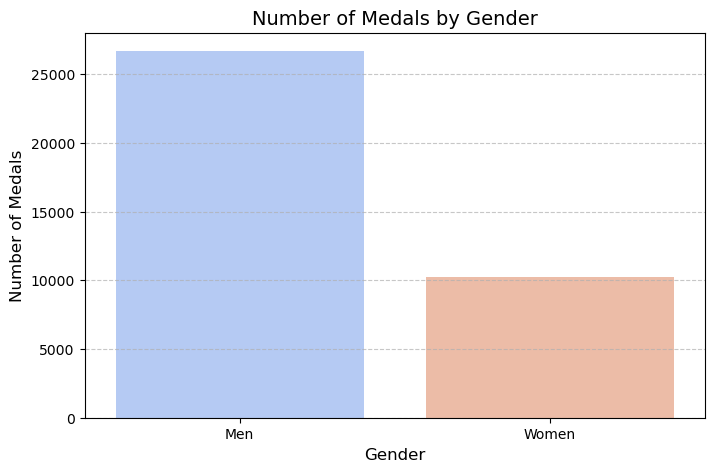

In [48]:
# Grouping the total number of medals by gender
medals_by_gender = df_olympic.groupby('Gender')['Medal'].count().reset_index()  
# Groups data by 'Gender' and counts the total number of medals won by each gender
# 'count()' counts the occurrences of medals for each gender
# 'reset_index()' resets the index to return a DataFrame

# Creating the plot
plt.figure(figsize=(8, 5))  # Setting figure size to 8x5 inches
sns.barplot(data=medals_by_gender, x='Gender', y='Medal', palette="coolwarm")  
# Creating a bar plot with 'Gender' on the x-axis and 'Medal' count on the y-axis
# 'palette="coolwarm"' applies a color gradient for better visualization

# Customizing the title and labels
plt.title("Number of Medals by Gender", fontsize=14)  # Setting the plot title
plt.xlabel("Gender", fontsize=12)  # Labeling the x-axis
plt.ylabel("Number of Medals", fontsize=12)  # Labeling the y-axis

# Adding horizontal grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

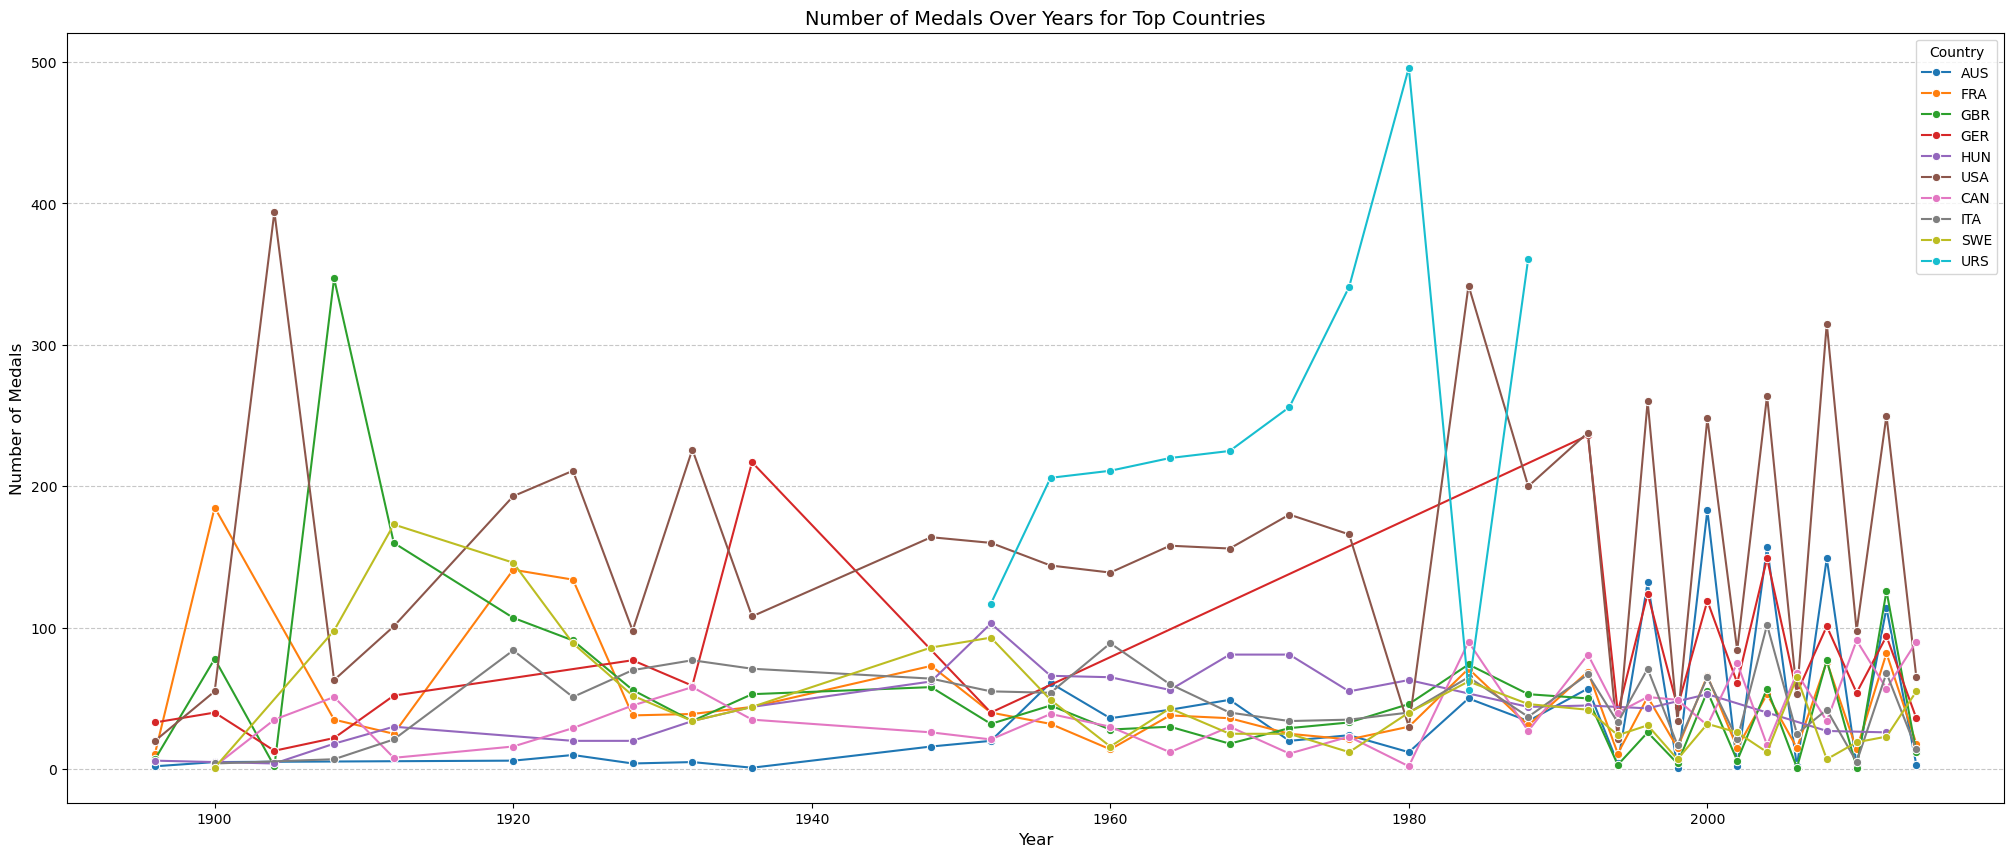

In [49]:
# Selecting the top 10 countries with the highest number of medals
top_countries = df_olympic.groupby('Country')['Medal'].count().nlargest(10).index  
# Groups data by 'Country' and counts the total medals per country
# 'nlargest(10)' selects the top 10 countries with the highest medal counts
# '.index' extracts the country names (indexes) of the top 10 countries

# Filtering the dataset to include only the top 10 countries
df_top = df_olympic[df_olympic['Country'].isin(top_countries)]  
# Keeps only rows where 'Country' is in the top_countries list

# Grouping medals by year and country
medals_by_year = df_top.groupby(['Year', 'Country'])['Medal'].count().reset_index()  
# Groups data by 'Year' and 'Country' and counts the number of medals each country won in each year
# 'reset_index()' ensures the result is a DataFrame

# Creating the plot
plt.figure(figsize=(25, 10))  # Setting figure size to 25x10 inches
sns.lineplot(data=medals_by_year, x='Year', y='Medal', hue='Country', marker="o")  
# Creating a line plot with 'Year' on the x-axis and 'Medal' count on the y-axis
# 'hue="Country"' differentiates lines by country
# 'marker="o"' adds circular markers at data points

# Customizing the title and labels
plt.title("Number of Medals Over Years for Top Countries", fontsize=14)  # Setting the plot title
plt.xlabel("Year", fontsize=12)  # Labeling the x-axis
plt.ylabel("Number of Medals", fontsize=12)  # Labeling the y-axis

# Adding a legend to identify countries
plt.legend(title="Country")  

# Adding horizontal grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

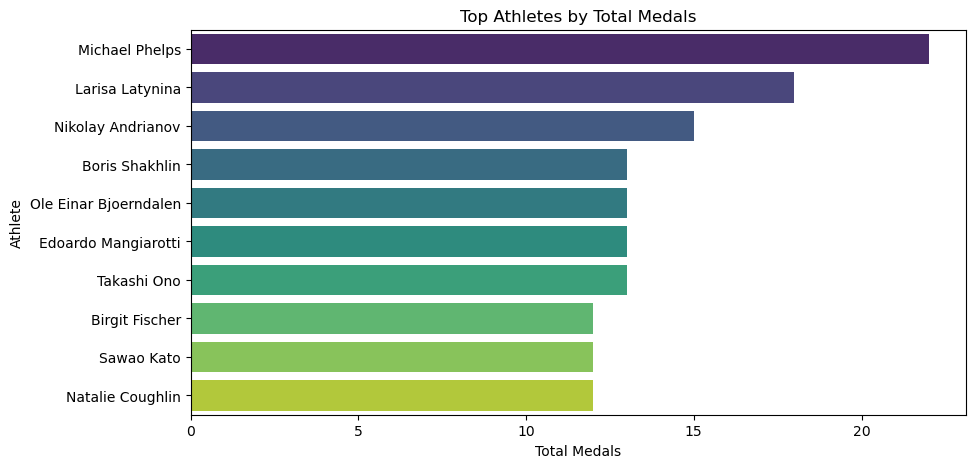

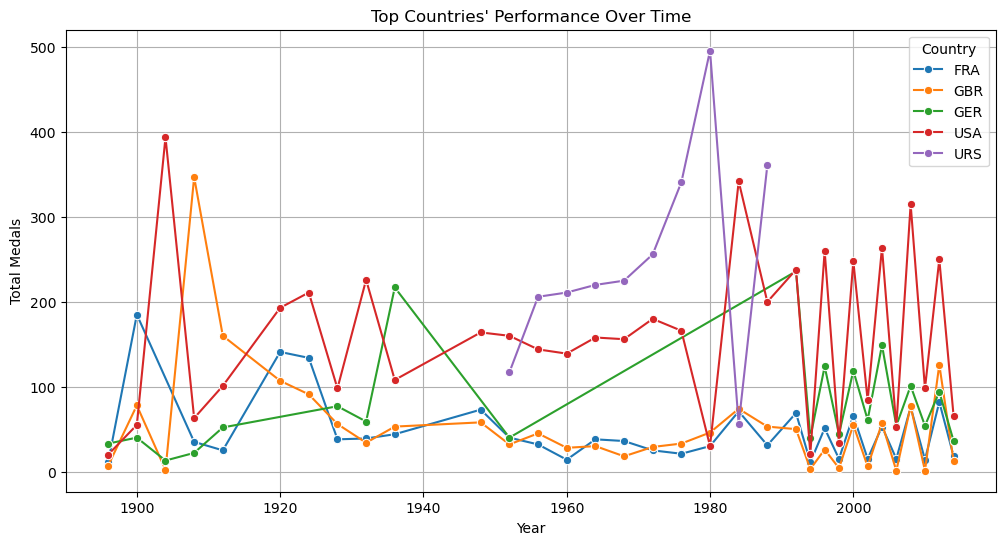

In [50]:
# Top athletes by total medals
athlete_medals = df_olympic.groupby("Athlete")["Medal"].count().reset_index()  # Grouping by athlete and counting medals
athlete_medals = athlete_medals.sort_values(by="Medal", ascending=False).head(10)  # Sorting and selecting top 10 athletes

# Top countries over time
df_olympic["Total Medals"] = 1  # Adding a helper column for medal count aggregation
country_medals = df_olympic.groupby(["Year", "Country"])["Total Medals"].count().reset_index()  # Grouping by year and country

def plot_top_athletes():
    """Function to visualize the top athletes by total medals."""
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Medal", y="Athlete", data=athlete_medals, palette="viridis")  # Bar plot for top athletes
    plt.xlabel("Total Medals")  # X-axis label
    plt.ylabel("Athlete")  # Y-axis label
    plt.title("Top Athletes by Total Medals")  # Plot title
    plt.show()

def plot_top_countries():
    """Function to visualize the performance of top countries over time."""
    top_countries = df_olympic["Country"].value_counts().head(5).index  # Selecting top 5 countries
    top_countries_data = country_medals[country_medals["Country"].isin(top_countries)]  # Filtering data for top countries
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Year", y="Total Medals", hue="Country", data=top_countries_data, marker="o")  # Line plot over time
    plt.xlabel("Year")  # X-axis label
    plt.ylabel("Total Medals")  # Y-axis label
    plt.title("Top Countries' Performance Over Time")  # Plot title
    plt.legend(title="Country")  # Legend title
    plt.grid(True)  # Adding grid for better readability
    plt.show()

# Plot visualizations
plot_top_athletes()  # Display top athletes visualization
plot_top_countries()  # Display top countries performance over time


Through this analysis, we observed the increasing globalization of the Olympic Games, with more nations competing and a wider range of countries winning medals. The evolution of athlete participation, particularly with the rise of women's events, has reshaped the landscape. Visualization and statistical analysis revealed interesting shifts in medal distributions, particularly the dominance of countries like the USA and Russia in the Summer Olympics. Future work could focus on predictive modeling to forecast medal counts based on historical performance, as well as examining the socio-economic impact of a nation's investment in sports development on Olympic outcomes.

